In [1]:
%load_ext autoreload
%autoreload 2


# Load DFallpa

In [ ]:
from pythonlib.dataset.scripts.analy_manuscript_figures import revision_eye_fixation_load_data
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_wrapper
from neuralmonkey.analyses.decode_moment import pipeline_get_dataset_params_from_codeword, train_decoder_helper, _test_decoder_helper



In [97]:
# Datasets 

# Xuan: replace lines in revision_eye_fixation_load_data() to load these dataset
# /lemur2/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230630-trial-kilosort_if_exists-norm=None-combine=True-t1=-1.0-t2=1.8-quest=PIG_BASE_trial.pkl 
# /lemur2/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230630-saccade_fix_on-kilosort_if_exists-norm=None-combine=True-t1=-0.4-t2=0.4-quest=PIG_BASE_saccade_fix_on.pkl

In [98]:
animal, date = ("Diego", 230630)
DFallpa = revision_eye_fixation_load_data(animal, date)


Loading DFallpa from:  /lemur2/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230630-saccade_fix_on-kilosort_if_exists-norm=None-combine=True-t1=-0.4-t2=0.4-quest=PIG_BASE_saccade_fix_on.pkl
Loading DFallpa from:  /lemur2/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230630-trial-kilosort_if_exists-norm=None-combine=True-t1=-1.0-t2=1.8-quest=PIG_BASE_trial.pkl


In [100]:
# You only need to work with event=="fixon_preparation"
DFallpa = DFallpa[DFallpa["event"] == "fixon_preparation"].reset_index(drop=True)
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,flex,fixon_preparation,M1,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(41, 2386, 80)"
1,flex,fixon_preparation,PMv,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(79, 2386, 80)"
2,flex,fixon_preparation,PMd,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 2386, 80)"
3,flex,fixon_preparation,dlPFC,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(28, 2386, 80)"
4,flex,fixon_preparation,vlPFC,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(51, 2386, 80)"
5,flex,fixon_preparation,FP,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(38, 2386, 80)"
6,flex,fixon_preparation,SMA,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(50, 2386, 80)"
7,flex,fixon_preparation,preSMA,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(56, 2386, 80)"


In [ ]:
skip_sitesdirty = True
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date, skip_sitesdirty=skip_sitesdirty)

 == (1) Matching chans across events
M1  ...  41
M1  ...  47
M1  ...  47
M1  ...  47
M1  -- n chans final:  41
PMv  ...  79
PMv  ...  80
PMv  ...  80
PMv  ...  80
PMv  -- n chans final:  79
PMd  ...  43
PMd  ...  43
PMd  ...  43
PMd  ...  43
PMd  -- n chans final:  43
dlPFC  ...  28
dlPFC  ...  29
dlPFC  ...  29
dlPFC  ...  29
dlPFC  -- n chans final:  28
vlPFC  ...  51
vlPFC  ...  49
vlPFC  ...  49
vlPFC  ...  49
vlPFC  -- n chans final:  49
FP  ...  38
FP  ...  40
FP  ...  40
FP  ...  40
FP  -- n chans final:  38
SMA  ...  50
SMA  ...  50
SMA  ...  50
SMA  ...  50
SMA  -- n chans final:  50
preSMA  ...  56
preSMA  ...  56
preSMA  ...  56
preSMA  ...  56
preSMA  -- n chans final:  54
 == (2) Remove bad chans based on drift
============== REMOVING DIRTY SITES:
... bregion  M1 ... event  fixon_preparation
Removing these bad chans: [1018]
Chans exist in PA: [1000, 1001, 1002, 1004, 1005, 1007, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1026,

In [64]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,flex,fixon_preparation,M1,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(41, 2386, 80)"
1,flex,fixon_preparation,PMv,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(79, 2386, 80)"
2,flex,fixon_preparation,PMd,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 2386, 80)"
3,flex,fixon_preparation,dlPFC,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(28, 2386, 80)"
4,flex,fixon_preparation,vlPFC,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(49, 2386, 80)"
5,flex,fixon_preparation,FP,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(38, 2386, 80)"
6,flex,fixon_preparation,SMA,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(50, 2386, 80)"
7,flex,fixon_preparation,preSMA,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(54, 2386, 80)"
8,trial,03_samp,M1,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(41, 646, 280)"
9,trial,03_samp,PMv,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(79, 646, 280)"


### Extract a single PA, to show how this code works

In [46]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,flex,fixon_preparation,M1,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(41, 2386, 80)"
1,flex,fixon_preparation,PMv,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(79, 2386, 80)"
2,flex,fixon_preparation,PMd,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 2386, 80)"
3,flex,fixon_preparation,dlPFC,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(28, 2386, 80)"
4,flex,fixon_preparation,vlPFC,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(49, 2386, 80)"
5,flex,fixon_preparation,FP,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(38, 2386, 80)"
6,flex,fixon_preparation,SMA,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(50, 2386, 80)"
7,flex,fixon_preparation,preSMA,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(54, 2386, 80)"
8,trial,03_samp,M1,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(41, 646, 280)"
9,trial,03_samp,PMv,"(-1.0, 1.8)",<neuralmonkey.classes.population.PopAnal objec...,"(79, 646, 280)"


In [ ]:
# Pull out example PA.
PA = DFallpa["pa"].values[1]

In [ ]:
# Keep just PIG trials
fd = {"task_kind":["prims_on_grid"]}
PA = PA.slice_by_labels_filtdict(fd)

pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (71, 2386, 80)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (71, 2005, 80)


In [74]:
# Preprocessing of PA
dflab = PA.Xlabels["trials"]
dflab["shape_fixation"] = dflab["shape-fixation"] # subtraction messes up the regression function string.

In [75]:
# Prepare variables for targeted PCA

variables = ["shape_fixation", "seqc_0_shape"]
# variables = ["seqc_0_shape", "shape_fixation"]
variables_is_cat = [True for _ in range(len(variables))]

display(dflab.loc[:, variables]) # print the values

,shape_fixation,seqc_0_shape
0,arcdeep-4-3-0,arcdeep-4-3-0
1,line-8-1-0,arcdeep-4-3-0
2,arcdeep-4-3-0,arcdeep-4-3-0
3,arcdeep-4-3-0,arcdeep-4-3-0
4,line-8-1-0,arcdeep-4-3-0
...,...,...
2000,V-2-2-0,line-8-1-0
2001,line-8-1-0,line-8-1-0
2002,V-2-2-0,line-8-1-0
2003,zigzagSq-1-1-1,zigzagSq-1-1-1


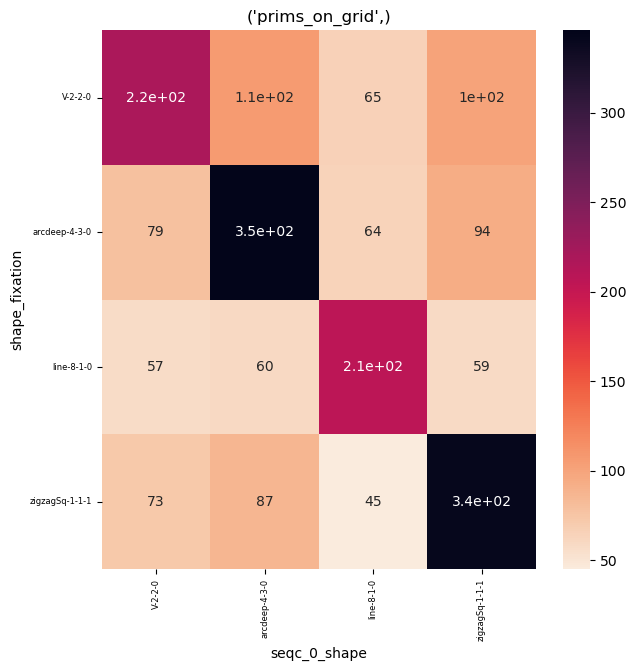

In [76]:
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap
grouping_plot_n_samples_conjunction_heatmap(dflab, variables[0], variables[1], ["task_kind"]);

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single_one_var_mult_axes
import os

for var_subspace in variables:
    npcs_keep_plot = 6

    LIST_VAR_VAROTHERS = [
        ("seqc_0_shape", ["task_kind", "shape_fixation"]),
        ("shape_fixation", ["task_kind", "seqc_0_shape"]),
    ]
    SAVEDIR = "/tmp/TESTTEST"
    os.makedirs(SAVEDIR, exist_ok=True)

    savedir_pca_subspaces = f"{SAVEDIR}/pca_subspaces"
    os.makedirs(savedir_pca_subspaces, exist_ok=True)

    pa_subspace, subspace_axes_orig, subspace_axes_normed, dfcoeff, _ = state_space_targeted_pca_scalar_single_one_var_mult_axes(
                                                                PA, twind_scal, variables, variables_is_cat, 
                                                                var_subspace, npcs_keep_plot, 
                                                                LIST_VAR_VAROTHERS, LIST_DIMS=None, SAVEDIR=SAVEDIR, 
                                                                just_extract_paredu=False,
                                                                savedir_pca_subspaces=savedir_pca_subspaces, 
                                                                tbin_dur = tbin_dur, tbin_slide = tbin_slide)

0.010000000000000682
0.15
Running PCA
cumvar 0.9 0.01
['Intercept', 'C(shape_fixation)[T.arcdeep-4-3-0]', 'C(shape_fixation)[T.line-8-1-0]', 'C(shape_fixation)[T.zigzagSq-1-1-1]', 'C(seqc_0_shape)[T.arcdeep-4-3-0]', 'C(seqc_0_shape)[T.line-8-1-0]', 'C(seqc_0_shape)[T.zigzagSq-1-1-1]']
shape_fixation True
seqc_0_shape True
For var=shape_fixation, this many levels: 3
For var=seqc_0_shape, this many levels: 3
fig: //tmp/TESTTEST/subspace=shape_fixation/color=seqc_0_shape-sub=task_kind|shape_fixation-dims=(0, 1).pdf
Saving ...  //tmp/TESTTEST/subspace=shape_fixation/color=seqc_0_shape-sub=task_kind|shape_fixation-dims=(0, 1).pdf
fig: //tmp/TESTTEST/subspace=shape_fixation/color=shape_fixation-sub=task_kind|seqc_0_shape-dims=(0, 1).pdf
Saving ...  //tmp/TESTTEST/subspace=shape_fixation/color=shape_fixation-sub=task_kind|seqc_0_shape-dims=(0, 1).pdf
0.010000000000000682
0.15
Running PCA
cumvar 0.9 0.01
['Intercept', 'C(shape_fixation)[T.arcdeep-4-3-0]', 'C(shape_fixation)[T.line-8-1-0]', 'C(

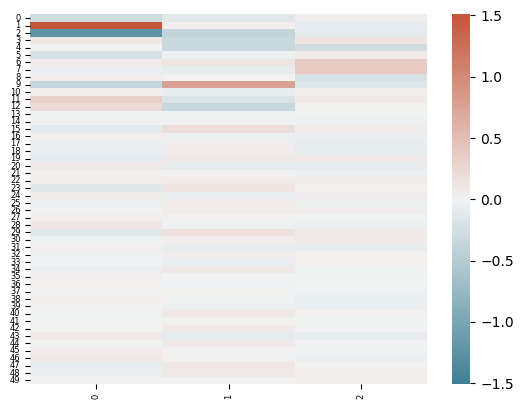

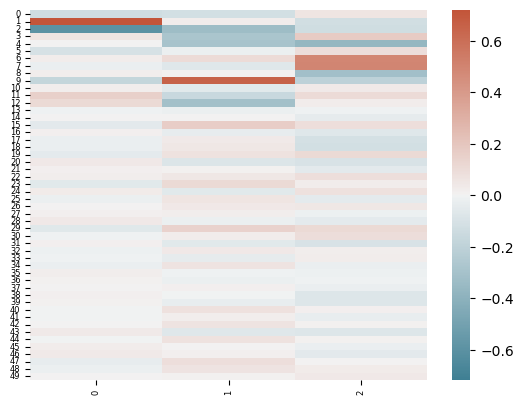

In [ ]:
# Plot the coefficients to visualize.

from pythonlib.tools.snstools import heatmap_mat
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# ax.imshow(subspace_axes_orig)
heatmap_mat(subspace_axes_orig, ax=ax, annotate_heatmap=False, diverge=True);
fig, ax = plt.subplots()
# ax.imshow(subspace_axes_orig)
heatmap_mat(subspace_axes_normed, ax=ax, annotate_heatmap=False, diverge=True);


In [ ]:
# Devo code:
if False:
    # Convert neural data to scalar, within a time window of interest
    # - Expand channels to (chans X time bins)
    pca_reduce = True
    twind_scal = (0, 0.3) # Get post-fixation
    # tbin_dur = "default"
    # tbin_slide = "default"
    tbin_dur = 0.15
    tbin_slide = 0.05
    npcs_keep_force = 50

    _, PAscal = PA.dataextract_dimred_wrapper("scal", "pca", "/tmp", twind_scal, tbin_dur, tbin_slide,
                                npcs_keep_force)

# Single neuron smoothed firing rates

In [79]:
PA.Chans

[1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1064,
 1065,
 1066,
 1068,
 1070,
 1071,
 1072,
 1073,
 1075,
 1076,
 1077,
 1079,
 1080,
 1081,
 1082,
 1083,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1093,
 1094,
 1095,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133]

In [91]:
chan = PA.Chans[19]

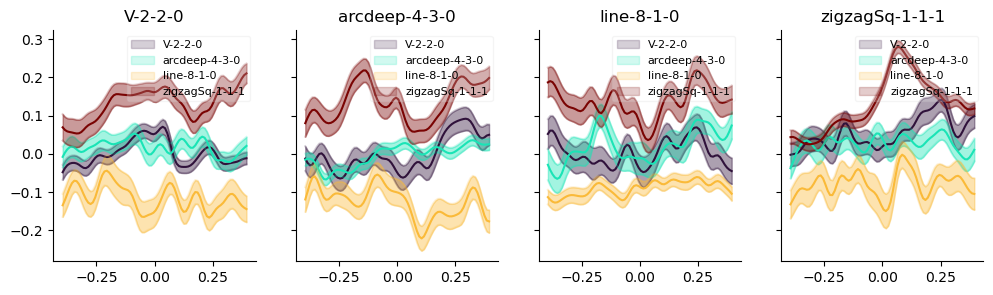

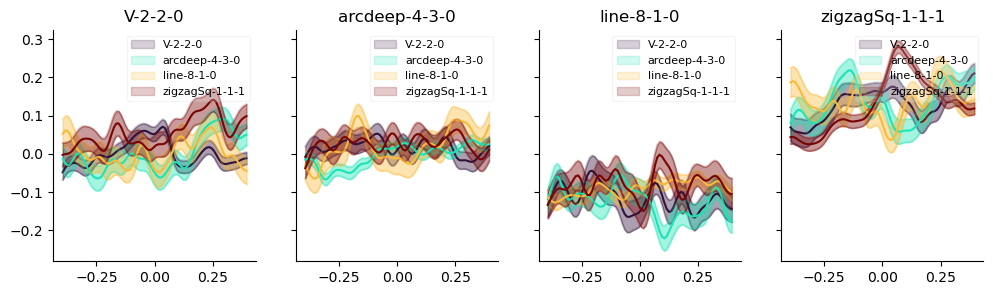

In [92]:
var_color = "seqc_0_shape"
var_subplots = "shape_fixation"
PA.plotwrapper_smoothed_fr_split_by_label_and_subplots(chan, var_color, var_subplots)

var_color = "shape_fixation"
var_subplots = "seqc_0_shape"
PA.plotwrapper_smoothed_fr_split_by_label_and_subplots(chan, var_color, var_subplots)

In [95]:
dflab = PA.Xlabels["trials"]
dflab["early-or-late-planning-period"]

0       early
1       early
2       early
3        late
4        late
        ...  
2000    early
2001     late
2002     late
2003    early
2004    early
Name: early-or-late-planning-period, Length: 2005, dtype: object

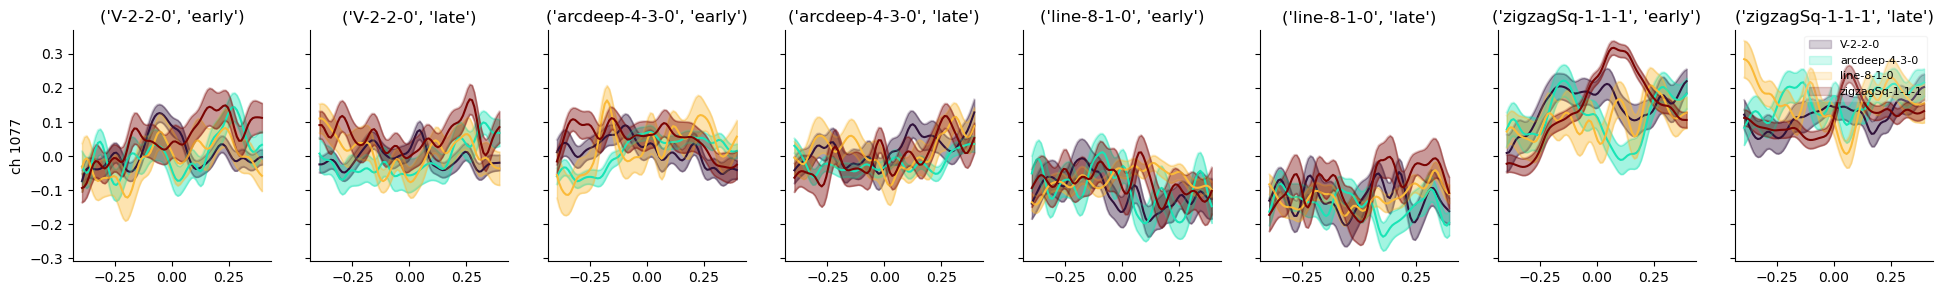

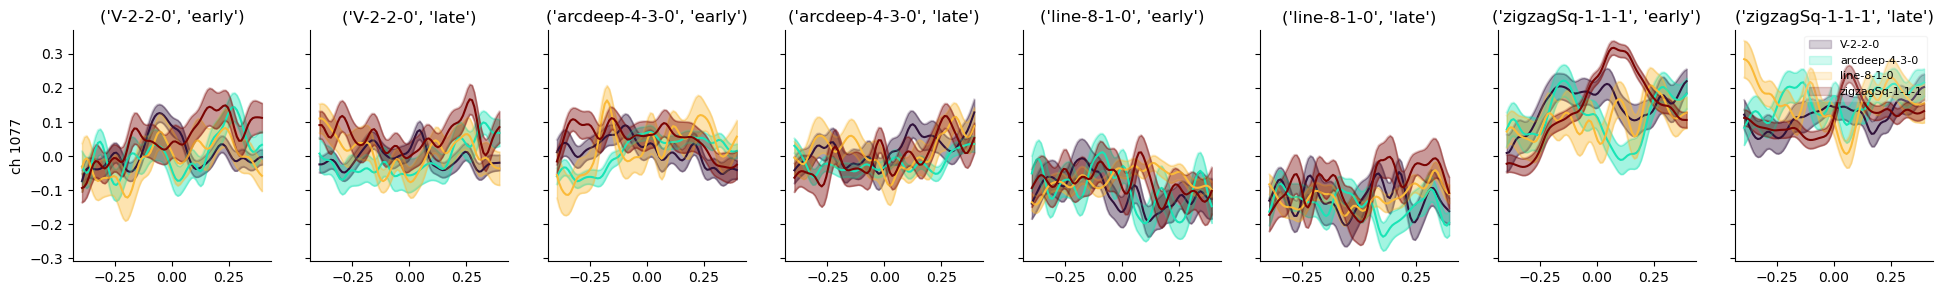

In [ ]:
PA.plotwrappergrid_smoothed_fr_splot_neuron(var_color, [var_subplots, "early-or-late-planning-period"], [chan])